In [ ]:
import torch

In [1]:
import numpy as np
def generate_samples(n = 1000, start = -100, end = 100, scaledown_factor = 1, target_scaledown_factor = 1):
    max_l = max(abs(start), abs(end))
    x = []
    y = []
    for i in range(n):
        x_sample = np.random.uniform(start, end, size=(2,))
        y_sample = x_sample[0] * x_sample[1] *(x_sample[0] + x_sample[1] + 1)
        x.append(x_sample)
        y.append(np.array([y_sample]))
    x, y = np.array(x), np.array(y)
    x /= scaledown_factor
    y /= target_scaledown_factor
#     x /= max_l / 5
#     y /= max_l**3 / 10
#     y /= target_scale_down
    return x, y

In [262]:
np.random.uniform(1, 10, size=(2,))

array([2.11444065, 1.36724046])

In [131]:
np.random.randint(0, 10, (2, ), dtype='int64')

array([8, 6], dtype=int64)

In [2]:
generate_samples(10)

(array([[-96.34078452,  33.16447586],
        [ 29.92232628, -87.35462312],
        [-81.66419811,  71.41883891],
        [-78.66756966,  17.67844738],
        [-80.08761762,  84.01255614],
        [ 65.4863186 , -67.48042903],
        [-55.927073  , -92.68906469],
        [-59.80333822, -86.53668463],
        [ 49.19107528, -72.48697731],
        [-25.29394279, -21.10172766]]),
 array([[ 198659.00288843],
        [ 147505.75857608],
        [  53922.28362459],
        [  83428.10158039],
        [ -33136.78632344],
        [   4393.01861681],
        [-765216.68067899],
        [-752161.16013638],
        [  79500.77338419],
        [ -24229.75262426]]))

In [95]:
from torch.utils.data import Dataset
class CustomDataset(Dataset):
    def __init__(self, x, y, transform=None, target_transform=None):
        self.x = x
        self.y = y
        self.transform=transform
        self.target_transform=target_transform
    def __len__(self):
        return len(self.y)
    def __getitem__(self, idx):
        x = self.x[idx]
        y = self.y[idx]
        if self.transform:
            x = self.transform(x)
        if self.target_transform:
            y = self.target_transform(y)
        return x, y

In [96]:
from torch import tensor
import numpy as np
r = 10
x, y = generate_samples(10000, -r, r)
x_test, y_test = generate_samples(1000, -r, r)
# mean_x, std_x = np.mean(x), np.std(x)
# mean_y, std_y = np.mean(y), np.std(y)
# x = [(item - mean_x) / std_x for item in x]
# y = [(item - mean_y) / std_y for item in y]
dataset = CustomDataset(x, y, transform=tensor)
test_dataset = CustomDataset(x_test, y_test, transform=tensor)

In [97]:
from torch.utils.data import DataLoader
batch_size = 32
train_dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [98]:
train_features, train_labels = next(iter(train_dataloader))
train_labels

tensor([[-3.9927e+00],
        [ 2.2616e+01],
        [ 4.5147e+01],
        [-2.6543e+02],
        [ 5.4842e+01],
        [ 5.6970e+01],
        [ 8.9582e-01],
        [ 2.9731e+01],
        [ 4.4180e+01],
        [-5.3574e+00],
        [ 1.7764e+02],
        [-3.5283e+01],
        [-4.9362e-02],
        [ 1.6132e+03],
        [ 1.1705e+02],
        [-4.5795e+01],
        [-5.6039e+02],
        [-9.7413e+00],
        [ 2.1855e+02],
        [-1.4310e+02],
        [ 2.8514e+00],
        [-6.9421e-01],
        [-8.5288e+01],
        [ 6.2045e+01],
        [ 1.2727e+02],
        [ 5.3978e+01],
        [ 1.5869e+02],
        [ 5.1259e+01],
        [ 4.3015e+01],
        [-2.0205e+02],
        [ 4.2545e+00],
        [ 6.7882e+01]], dtype=torch.float64)

In [99]:
train_features

tensor([[ 6.8338, -0.0753],
        [ 4.2233,  0.8777],
        [ 3.8507,  1.7707],
        [-4.4722,  9.6333],
        [ 2.0994, -6.8905],
        [-7.3072,  1.6877],
        [-6.4147,  0.0259],
        [ 2.0473,  2.5805],
        [-6.2998,  2.7448],
        [-2.3506, -0.9786],
        [ 6.9112,  2.4748],
        [-3.0368, -2.5390],
        [-0.0982, -1.2910],
        [ 8.8937,  9.4010],
        [-9.8526,  7.2033],
        [-6.5802,  6.6299],
        [-6.6868, -6.7425],
        [-0.4941,  4.1945],
        [ 4.4037,  4.8433],
        [ 7.7117, -3.7098],
        [ 0.0701,  5.8631],
        [-0.8892, -0.9407],
        [-4.0987, -3.2682],
        [ 1.0134,  6.8823],
        [ 6.3503,  2.1170],
        [-8.4008,  1.0045],
        [-9.6106,  5.7278],
        [ 6.1821, -8.1940],
        [ 7.4248, -9.0640],
        [-4.6274,  8.6659],
        [ 0.6098,  1.9564],
        [-8.3872,  1.3379]], dtype=torch.float64)

In [132]:
from torch import nn, cuda
device = 'cuda' if cuda.is_available() else 'cpu'
print(device)
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        n = 64
        n_layers = 4
        self.flatten = nn.Flatten()
        layers = []
        for i in range(n_layers - 1):
            layers.append(nn.Linear(n, n))
            layers.append(nn.ReLU())
#             layers.append(nn.BatchNorm1d(n))
            
        self.linear_relu = nn.Sequential(
            nn.Linear(2, n),
            nn.ReLU(),
#             nn.BatchNorm1d(n),
            *layers,
            nn.Linear(n, 1),
        )
        self.double()
    def forward(self, x):
        x = self.flatten(x)
        return self.linear_relu(x)
    
model = NeuralNetwork().to(device)
model

cpu


NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu): Sequential(
    (0): Linear(in_features=2, out_features=64, bias=True)
    (1): ReLU()
    (2): Linear(in_features=64, out_features=64, bias=True)
    (3): ReLU()
    (4): Linear(in_features=64, out_features=64, bias=True)
    (5): ReLU()
    (6): Linear(in_features=64, out_features=64, bias=True)
    (7): ReLU()
    (8): Linear(in_features=64, out_features=1, bias=True)
  )
)

In [136]:
from torch import nn, optim
from torch.optim.lr_scheduler import StepLR
loss_fn = nn.L1Loss()
optimizer = optim.SGD(model.parameters(), lr=1e-3, momentum=0.9)#, momentum=0.9, weight_decay=0.99)
scheduler = StepLR(optimizer, step_size=100, gamma=0.1)

In [137]:
import torch
def test(dataloader, model, loss_fn):
    loss = 0
    model.eval()
    with torch.no_grad():
        for x, y in dataloader:
            x, y = x.to(device), y.to(device)
            pred = model(x)
            loss += loss_fn(pred, y).item()
    loss /= len(dataloader)
    return loss

def train(dataloader, model, loss_fn, optimizer):
    model.train()
    for batch, (x, y) in enumerate(dataloader):
        x, y = x.to(device), y.to(device)
        pred = model(x)
        loss = loss_fn(pred, y)
        
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        
        if batch % 30 == 0:
            print(f'loss: {loss.item()} [{batch}/{len(train_dataloader)}]')
    scheduler.step()

In [138]:
epochs = 400
losses = []
for t in range(epochs):
    print(f'epoch:{t + 1}')
    train(train_dataloader, model, loss_fn, optimizer)
    losses.append(test(test_dataloader, model, loss_fn))
# losses = [np.log(item) for item in losses]
print('Done')

epoch:1
loss: 132.0847843171182 [0/313]
loss: 147.91120637989883 [30/313]
loss: 192.18470480916204 [60/313]
loss: 223.35499341282917 [90/313]
loss: 248.11558849961958 [120/313]
loss: 249.08911654133567 [150/313]
loss: 212.25506003207983 [180/313]
loss: 168.0217235064788 [210/313]
loss: 123.83668198775479 [240/313]
loss: 147.92310908937304 [270/313]
loss: 87.83585184692001 [300/313]
epoch:2
loss: 85.51902136632847 [0/313]
loss: 57.81509509403405 [30/313]
loss: 64.25215015143439 [60/313]
loss: 86.85599968161895 [90/313]
loss: 142.96420263130466 [120/313]
loss: 122.43562125451746 [150/313]
loss: 108.08884422319602 [180/313]
loss: 108.69492732887508 [210/313]
loss: 92.62436192755942 [240/313]
loss: 99.51845873645111 [270/313]
loss: 105.06271781867207 [300/313]
epoch:3
loss: 57.95317752453427 [0/313]
loss: 26.158079656011857 [30/313]
loss: 50.028364666904054 [60/313]
loss: 102.1182990258209 [90/313]
loss: 59.02954774356661 [120/313]
loss: 70.66805061505242 [150/313]
loss: 35.96027311777833 

loss: 56.6790282156868 [240/313]
loss: 22.323286035005687 [270/313]
loss: 46.75027484513156 [300/313]
epoch:23
loss: 24.144884959073142 [0/313]
loss: 31.35487234150764 [30/313]
loss: 30.561124389614665 [60/313]
loss: 45.31062695224788 [90/313]
loss: 37.46545619251269 [120/313]
loss: 18.278817987589342 [150/313]
loss: 32.56892993881656 [180/313]
loss: 35.93247983223781 [210/313]
loss: 36.58453476404307 [240/313]
loss: 51.92783110272693 [270/313]
loss: 35.82949443467394 [300/313]
epoch:24
loss: 147.74157972268574 [0/313]
loss: 34.57813525808378 [30/313]
loss: 50.83684459773476 [60/313]
loss: 34.61600819518637 [90/313]
loss: 26.030194556854717 [120/313]
loss: 44.25283315914313 [150/313]
loss: 71.74097736631491 [180/313]
loss: 61.824100015810835 [210/313]
loss: 37.00512172806104 [240/313]
loss: 14.606558850293602 [270/313]
loss: 72.82185006395896 [300/313]
epoch:25
loss: 86.16239221485411 [0/313]
loss: 30.774110294653006 [30/313]
loss: 26.17579772224758 [60/313]
loss: 31.62001496381344 [90

loss: 44.583189270312396 [60/313]
loss: 57.61238866426529 [90/313]
loss: 79.98724431046271 [120/313]
loss: 29.905383461170416 [150/313]
loss: 47.30308651689363 [180/313]
loss: 42.9200953613313 [210/313]
loss: 76.4317495311222 [240/313]
loss: 39.59155476342246 [270/313]
loss: 40.96406696366605 [300/313]
epoch:45
loss: 22.479796947097164 [0/313]
loss: 58.30823893351939 [30/313]
loss: 35.13164173148016 [60/313]
loss: 96.80820603829194 [90/313]
loss: 22.21037583458287 [120/313]
loss: 49.47710106825845 [150/313]
loss: 26.102547490627074 [180/313]
loss: 43.79236618209693 [210/313]
loss: 25.557304618037495 [240/313]
loss: 18.249441397535364 [270/313]
loss: 43.42831889985567 [300/313]
epoch:46
loss: 44.988196608352226 [0/313]
loss: 40.57692940130256 [30/313]
loss: 37.54391752384053 [60/313]
loss: 36.22579931471676 [90/313]
loss: 19.560454211520074 [120/313]
loss: 14.937987377760514 [150/313]
loss: 20.371311436329087 [180/313]
loss: 33.138453325799375 [210/313]
loss: 19.890965847878114 [240/313

loss: 64.74649309956865 [270/313]
loss: 25.91872540719734 [300/313]
epoch:66
loss: 49.1413520861684 [0/313]
loss: 24.530837810793955 [30/313]
loss: 73.14398814016369 [60/313]
loss: 58.90639773688524 [90/313]
loss: 43.921808764449096 [120/313]
loss: 31.17693829353496 [150/313]
loss: 28.009518985206398 [180/313]
loss: 34.14869709885029 [210/313]
loss: 43.445096205815105 [240/313]
loss: 17.617050189809838 [270/313]
loss: 47.283857784975794 [300/313]
epoch:67
loss: 27.259888212334516 [0/313]
loss: 51.185678505608614 [30/313]
loss: 62.40862115299354 [60/313]
loss: 35.01883562301519 [90/313]
loss: 23.107665027989313 [120/313]
loss: 36.27356598260048 [150/313]
loss: 35.69461771976381 [180/313]
loss: 48.800066294527056 [210/313]
loss: 47.05003847361854 [240/313]
loss: 27.850980431733568 [270/313]
loss: 39.12762723957557 [300/313]
epoch:68
loss: 57.05023971439876 [0/313]
loss: 41.01096408628798 [30/313]
loss: 34.3632088084167 [60/313]
loss: 38.16297017744766 [90/313]
loss: 16.471009487205865 [1

loss: 54.802627615157576 [150/313]
loss: 96.84259965134149 [180/313]
loss: 31.944833729531716 [210/313]
loss: 30.800010216706184 [240/313]
loss: 51.39883926880049 [270/313]
loss: 76.10873262537763 [300/313]
epoch:88
loss: 40.22189106901992 [0/313]
loss: 46.867146416204505 [30/313]
loss: 14.514332827635137 [60/313]
loss: 26.402765699948496 [90/313]
loss: 31.511386510647316 [120/313]
loss: 19.146918098805333 [150/313]
loss: 15.34779515647408 [180/313]
loss: 27.347850796942588 [210/313]
loss: 27.519114930745538 [240/313]
loss: 36.362338321935994 [270/313]
loss: 14.393691868033237 [300/313]
epoch:89
loss: 30.592549240241006 [0/313]
loss: 58.10679915119481 [30/313]
loss: 68.16706139988764 [60/313]
loss: 25.5497155173847 [90/313]
loss: 34.33494879357507 [120/313]
loss: 16.622410863865323 [150/313]
loss: 13.323352881079947 [180/313]
loss: 25.465487504842386 [210/313]
loss: 33.59888922680792 [240/313]
loss: 31.896422366694313 [270/313]
loss: 48.46587462303778 [300/313]
epoch:90
loss: 17.076255

loss: 6.494805153668787 [30/313]
loss: 2.8530037540062105 [60/313]
loss: 4.465295015944878 [90/313]
loss: 5.694522445819482 [120/313]
loss: 4.536423270900436 [150/313]
loss: 5.554402471033004 [180/313]
loss: 2.9262862953372797 [210/313]
loss: 8.09585678579978 [240/313]
loss: 8.127424580261806 [270/313]
loss: 5.742003590545594 [300/313]
epoch:110
loss: 4.462025322750136 [0/313]
loss: 7.37030514201585 [30/313]
loss: 5.372753443856772 [60/313]
loss: 8.773110889734726 [90/313]
loss: 11.401079849185884 [120/313]
loss: 5.576233366438541 [150/313]
loss: 5.202216032378309 [180/313]
loss: 7.209790116693684 [210/313]
loss: 4.454170913467204 [240/313]
loss: 9.15912818367082 [270/313]
loss: 5.272439195819864 [300/313]
epoch:111
loss: 7.6590863594523135 [0/313]
loss: 7.827826147528256 [30/313]
loss: 5.007880099299827 [60/313]
loss: 5.7880774493323015 [90/313]
loss: 8.516494005536245 [120/313]
loss: 3.170481975850605 [150/313]
loss: 4.408331212598349 [180/313]
loss: 5.857095634446802 [210/313]
loss:

loss: 4.357994291761917 [270/313]
loss: 3.5822981666130413 [300/313]
epoch:131
loss: 3.1201027261052894 [0/313]
loss: 3.5563843624735867 [30/313]
loss: 3.527928136425378 [60/313]
loss: 4.1133088857764015 [90/313]
loss: 3.306337201690103 [120/313]
loss: 6.2785537198034005 [150/313]
loss: 4.807725389769155 [180/313]
loss: 2.768716866949502 [210/313]
loss: 2.857418977520308 [240/313]
loss: 2.4497964355792075 [270/313]
loss: 8.480209317805235 [300/313]
epoch:132
loss: 6.579756719554623 [0/313]
loss: 9.494826156673579 [30/313]
loss: 3.218106854161884 [60/313]
loss: 3.480988552090246 [90/313]
loss: 10.274583012171243 [120/313]
loss: 3.7284163383401507 [150/313]
loss: 8.48249626192389 [180/313]
loss: 3.3367094880246655 [210/313]
loss: 3.467495458041134 [240/313]
loss: 2.5177402740022155 [270/313]
loss: 2.9190538896100833 [300/313]
epoch:133
loss: 5.208949833880434 [0/313]
loss: 7.114905431392539 [30/313]
loss: 3.2559096514754104 [60/313]
loss: 3.8674986212782136 [90/313]
loss: 4.4708875890288

loss: 4.454789347745217 [90/313]
loss: 4.408127432775013 [120/313]
loss: 4.175495282918776 [150/313]
loss: 7.38419955232905 [180/313]
loss: 4.596409733740427 [210/313]
loss: 2.6649990347227224 [240/313]
loss: 5.8836064701428405 [270/313]
loss: 4.162998599215159 [300/313]
epoch:153
loss: 5.819981923690077 [0/313]
loss: 3.6893874543159404 [30/313]
loss: 2.526641417016902 [60/313]
loss: 4.508541369399301 [90/313]
loss: 2.6203995430748233 [120/313]
loss: 4.7185027725056585 [150/313]
loss: 2.9253003229925723 [180/313]
loss: 4.67157011301859 [210/313]
loss: 3.0264736016025804 [240/313]
loss: 4.515636815132833 [270/313]
loss: 3.1963519283137938 [300/313]
epoch:154
loss: 5.470881864600546 [0/313]
loss: 3.365298892865167 [30/313]
loss: 5.669810945125382 [60/313]
loss: 2.9373438540844066 [90/313]
loss: 4.3779052499655355 [120/313]
loss: 2.958456109724832 [150/313]
loss: 2.803253793121316 [180/313]
loss: 2.59254827642686 [210/313]
loss: 12.620176078265299 [240/313]
loss: 2.598431240567135 [270/31

loss: 3.6849296667024527 [30/313]
loss: 4.515750436071627 [60/313]
loss: 2.2422985015692447 [90/313]
loss: 6.669588076088617 [120/313]
loss: 3.821531019829035 [150/313]
loss: 5.610501956190827 [180/313]
loss: 9.941486974852571 [210/313]
loss: 2.660777936769819 [240/313]
loss: 4.061203726268302 [270/313]
loss: 5.575184376746245 [300/313]
epoch:175
loss: 2.7843522072756475 [0/313]
loss: 3.681111732682759 [30/313]
loss: 2.332808315304252 [60/313]
loss: 2.9752013548295593 [90/313]
loss: 5.592841823080138 [120/313]
loss: 2.4639029659166067 [150/313]
loss: 3.509922375963752 [180/313]
loss: 2.8004605699831138 [210/313]
loss: 5.625807138252473 [240/313]
loss: 3.912476412076802 [270/313]
loss: 4.970779018105662 [300/313]
epoch:176
loss: 3.366139143655439 [0/313]
loss: 3.236733123376429 [30/313]
loss: 6.969303363699674 [60/313]
loss: 6.629456830649562 [90/313]
loss: 2.1061475785929695 [120/313]
loss: 3.019725805921043 [150/313]
loss: 5.290444025982392 [180/313]
loss: 4.683309537337509 [210/313]


loss: 6.730698551183653 [240/313]
loss: 4.321385014959896 [270/313]
loss: 2.1039099011435782 [300/313]
epoch:196
loss: 4.393150965022526 [0/313]
loss: 4.877512409779707 [30/313]
loss: 3.705258204769236 [60/313]
loss: 3.9817078144342983 [90/313]
loss: 5.9260557516080725 [120/313]
loss: 3.668856358560982 [150/313]
loss: 8.980495952959817 [180/313]
loss: 4.08923487474131 [210/313]
loss: 3.6518559299935607 [240/313]
loss: 2.2282092479420186 [270/313]
loss: 3.2734189232894693 [300/313]
epoch:197
loss: 4.161330178493413 [0/313]
loss: 3.4067990808912163 [30/313]
loss: 3.920156248455582 [60/313]
loss: 4.047636395653483 [90/313]
loss: 6.405344534525283 [120/313]
loss: 3.807081247372976 [150/313]
loss: 2.8391757158686657 [180/313]
loss: 2.9391529997300627 [210/313]
loss: 5.104037451330383 [240/313]
loss: 4.109572491446224 [270/313]
loss: 2.370008227534186 [300/313]
epoch:198
loss: 2.302500648577573 [0/313]
loss: 3.682926669470563 [30/313]
loss: 7.043878393445519 [60/313]
loss: 1.9610857513946134

epoch:217
loss: 1.3436898696792932 [0/313]
loss: 1.4355469038036262 [30/313]
loss: 1.6057545921250602 [60/313]
loss: 1.412099679318713 [90/313]
loss: 0.9010008085883257 [120/313]
loss: 1.4651934472432275 [150/313]
loss: 1.6583660221904284 [180/313]
loss: 1.7666351478289437 [210/313]
loss: 1.9733836018823856 [240/313]
loss: 2.7269064469124116 [270/313]
loss: 1.4914923737104384 [300/313]
epoch:218
loss: 1.8051676999742026 [0/313]
loss: 1.8543127284314909 [30/313]
loss: 2.3714303779794887 [60/313]
loss: 3.249207239251001 [90/313]
loss: 1.600319707804827 [120/313]
loss: 1.761936358886962 [150/313]
loss: 1.1401917416805867 [180/313]
loss: 1.5938802443674327 [210/313]
loss: 1.3968311714222768 [240/313]
loss: 1.9377482815603924 [270/313]
loss: 1.7374663354291484 [300/313]
epoch:219
loss: 1.4676385598118777 [0/313]
loss: 1.3936526788675287 [30/313]
loss: 1.9602103778269357 [60/313]
loss: 1.6940007895321127 [90/313]
loss: 1.1367661191163423 [120/313]
loss: 2.483541810912132 [150/313]
loss: 1.95

loss: 1.6581772384031854 [90/313]
loss: 1.4028613759568513 [120/313]
loss: 1.6378833908996226 [150/313]
loss: 1.6477548179703332 [180/313]
loss: 1.7238256347295913 [210/313]
loss: 2.502849835188159 [240/313]
loss: 2.188528767414171 [270/313]
loss: 1.07632657853664 [300/313]
epoch:239
loss: 1.2402752856255908 [0/313]
loss: 2.2145386066541475 [30/313]
loss: 1.1789775671227483 [60/313]
loss: 1.4143568010144605 [90/313]
loss: 1.8719196808551777 [120/313]
loss: 1.7506653386479205 [150/313]
loss: 1.517232258863818 [180/313]
loss: 1.2503578931237076 [210/313]
loss: 1.4254368130960031 [240/313]
loss: 1.9981731491097658 [270/313]
loss: 1.7053185005039277 [300/313]
epoch:240
loss: 1.5419265971997218 [0/313]
loss: 1.3517742917923785 [30/313]
loss: 1.3534943896202951 [60/313]
loss: 1.30563743457643 [90/313]
loss: 1.208058018693407 [120/313]
loss: 1.1938644292580434 [150/313]
loss: 2.3864131751587316 [180/313]
loss: 1.8469741910872932 [210/313]
loss: 1.8504687108581201 [240/313]
loss: 2.05148815535

loss: 1.7995137474970009 [240/313]
loss: 1.3373674920794043 [270/313]
loss: 2.1718695908078884 [300/313]
epoch:260
loss: 1.5337778484372477 [0/313]
loss: 1.3754932515274496 [30/313]
loss: 1.973392046213699 [60/313]
loss: 1.0525917553101967 [90/313]
loss: 2.0577439067015915 [120/313]
loss: 1.440583083236918 [150/313]
loss: 2.0702125529457294 [180/313]
loss: 1.5399234157444623 [210/313]
loss: 1.7505871130543864 [240/313]
loss: 1.657845725963345 [270/313]
loss: 1.5850757763683447 [300/313]
epoch:261
loss: 1.4229322850387187 [0/313]
loss: 1.3178472617293546 [30/313]
loss: 1.3981619935792113 [60/313]
loss: 1.5829671332802668 [90/313]
loss: 1.7106723782557434 [120/313]
loss: 1.0896587002296072 [150/313]
loss: 1.3642443261117094 [180/313]
loss: 1.0669623153480026 [210/313]
loss: 1.194095810084514 [240/313]
loss: 1.456272959096997 [270/313]
loss: 1.5172162201466617 [300/313]
epoch:262
loss: 1.0711338330220168 [0/313]
loss: 0.9283922563219793 [30/313]
loss: 1.2055549565891766 [60/313]
loss: 1.8

loss: 1.3521915062971637 [90/313]
loss: 1.322476615696884 [120/313]
loss: 1.9037755357113006 [150/313]
loss: 1.4581725260677303 [180/313]
loss: 1.2152083124115922 [210/313]
loss: 1.8766167509321292 [240/313]
loss: 2.184317946615739 [270/313]
loss: 2.2168480157095027 [300/313]
epoch:282
loss: 1.6688043293863175 [0/313]
loss: 1.4466575856667532 [30/313]
loss: 1.8387918731414805 [60/313]
loss: 1.491009155644875 [90/313]
loss: 1.9824283489467955 [120/313]
loss: 1.947585326267476 [150/313]
loss: 1.7659277446427857 [180/313]
loss: 1.3948977808983825 [210/313]
loss: 1.570508503094481 [240/313]
loss: 1.6592857082779213 [270/313]
loss: 1.2169980441094577 [300/313]
epoch:283
loss: 1.3538266632946954 [0/313]
loss: 2.1217326609655767 [30/313]
loss: 1.1147755231100653 [60/313]
loss: 2.015306598797785 [90/313]
loss: 1.4129466342940753 [120/313]
loss: 1.7676301889228503 [150/313]
loss: 2.28598063731637 [180/313]
loss: 1.5562464944635201 [210/313]
loss: 1.5247407812976854 [240/313]
loss: 1.06291513664

loss: 1.7472444033140544 [150/313]
loss: 1.5262267355771721 [180/313]
loss: 1.0617419416204352 [210/313]
loss: 1.4123578890249333 [240/313]
loss: 1.4194133812048213 [270/313]
loss: 1.2570299136639547 [300/313]
epoch:303
loss: 1.181884894613465 [0/313]
loss: 1.3626589807671246 [30/313]
loss: 1.6126687574566116 [60/313]
loss: 1.3182541984826486 [90/313]
loss: 1.2823881401291517 [120/313]
loss: 1.2461190340813677 [150/313]
loss: 1.3751081046592986 [180/313]
loss: 1.0155698725505318 [210/313]
loss: 1.0974807520635055 [240/313]
loss: 1.5015960491796627 [270/313]
loss: 2.176001293781833 [300/313]
epoch:304
loss: 1.389297356486103 [0/313]
loss: 1.4560018359051219 [30/313]
loss: 1.319536587843951 [60/313]
loss: 1.178624956491458 [90/313]
loss: 1.1112756863139328 [120/313]
loss: 1.4308822632519054 [150/313]
loss: 1.2367749736195648 [180/313]
loss: 1.3062145374928624 [210/313]
loss: 1.1612619424459798 [240/313]
loss: 1.8807744075444002 [270/313]
loss: 1.6941280878319036 [300/313]
epoch:305
loss:

loss: 1.4136476020947304 [270/313]
loss: 1.3353888776260183 [300/313]
epoch:324
loss: 1.016206404480617 [0/313]
loss: 0.9060365285445773 [30/313]
loss: 1.2894244099026149 [60/313]
loss: 1.5805036323771502 [90/313]
loss: 1.1974466211143522 [120/313]
loss: 1.5436909639261645 [150/313]
loss: 1.0922981248840165 [180/313]
loss: 1.500793564503242 [210/313]
loss: 1.627845065142894 [240/313]
loss: 1.1148454175586728 [270/313]
loss: 1.565562078961776 [300/313]
epoch:325
loss: 1.438315873973763 [0/313]
loss: 2.0508007354433784 [30/313]
loss: 1.0989479289452733 [60/313]
loss: 0.9628687065841851 [90/313]
loss: 1.9701982252383607 [120/313]
loss: 1.6190075351034148 [150/313]
loss: 1.189434968221942 [180/313]
loss: 1.5399072526557898 [210/313]
loss: 1.3936102475680443 [240/313]
loss: 2.3610081868582404 [270/313]
loss: 2.5057907943901174 [300/313]
epoch:326
loss: 1.4944448860325994 [0/313]
loss: 1.6437242045197373 [30/313]
loss: 1.2610381072395689 [60/313]
loss: 1.5295200216848457 [90/313]
loss: 1.424

loss: 1.3910253582147571 [30/313]
loss: 1.3165553972630306 [60/313]
loss: 1.6995774260558338 [90/313]
loss: 0.8724863624693395 [120/313]
loss: 1.207193666499018 [150/313]
loss: 1.3126314043086436 [180/313]
loss: 1.7277882047616138 [210/313]
loss: 1.0346428381979742 [240/313]
loss: 1.1580509289417844 [270/313]
loss: 1.4206138928746292 [300/313]
epoch:346
loss: 1.3975948723921938 [0/313]
loss: 1.299691735903141 [30/313]
loss: 1.0332400952526863 [60/313]
loss: 1.6246371272201026 [90/313]
loss: 1.3724162509118365 [120/313]
loss: 1.2310345996486525 [150/313]
loss: 1.2339136513211897 [180/313]
loss: 1.150588603509041 [210/313]
loss: 1.6972373728293277 [240/313]
loss: 1.4990296666726242 [270/313]
loss: 1.9275217828353113 [300/313]
epoch:347
loss: 1.4267467670652718 [0/313]
loss: 1.3379574929900344 [30/313]
loss: 1.7176711480062212 [60/313]
loss: 0.8667470159025429 [90/313]
loss: 1.193144771520387 [120/313]
loss: 1.4110243022440814 [150/313]
loss: 1.933359135290849 [180/313]
loss: 1.4706153755

loss: 1.275208834288304 [120/313]
loss: 1.6161188139907743 [150/313]
loss: 1.3204630846610135 [180/313]
loss: 1.0662263666370269 [210/313]
loss: 1.747708550740311 [240/313]
loss: 0.8963189743073998 [270/313]
loss: 1.1403932939700088 [300/313]
epoch:367
loss: 1.3220619911507163 [0/313]
loss: 1.6877201762307945 [30/313]
loss: 1.2974607300447074 [60/313]
loss: 1.4690929380582698 [90/313]
loss: 1.4129223701651001 [120/313]
loss: 1.1159601016857696 [150/313]
loss: 1.3601299141216763 [180/313]
loss: 1.3383915547586878 [210/313]
loss: 1.5459341932470898 [240/313]
loss: 1.5138376444192008 [270/313]
loss: 1.3905285586305614 [300/313]
epoch:368
loss: 1.1715103087417065 [0/313]
loss: 1.7922383116758325 [30/313]
loss: 1.2130141221404318 [60/313]
loss: 1.783300209886678 [90/313]
loss: 1.09946784114702 [120/313]
loss: 1.0075182678766441 [150/313]
loss: 1.4471096916191055 [180/313]
loss: 1.8168395887949336 [210/313]
loss: 1.791385251956344 [240/313]
loss: 1.1548164452483143 [270/313]
loss: 0.99670634

loss: 1.8486593640219586 [180/313]
loss: 1.2521950486899869 [210/313]
loss: 1.0966659261230614 [240/313]
loss: 1.5610524598541675 [270/313]
loss: 1.6116348839948438 [300/313]
epoch:388
loss: 1.3479719502578802 [0/313]
loss: 1.5306490269170527 [30/313]
loss: 1.2883235958589072 [60/313]
loss: 0.8961078797507156 [90/313]
loss: 0.8413888657952123 [120/313]
loss: 1.1853352942001276 [150/313]
loss: 1.3150531268081027 [180/313]
loss: 0.8351403362562416 [210/313]
loss: 1.4326399105165732 [240/313]
loss: 1.8462357407084964 [270/313]
loss: 1.115659916286558 [300/313]
epoch:389
loss: 1.3286719178580702 [0/313]
loss: 1.4670925597933717 [30/313]
loss: 1.552582714215889 [60/313]
loss: 1.6799007169512628 [90/313]
loss: 0.992277772046556 [120/313]
loss: 1.1507172268443675 [150/313]
loss: 1.0232345012020008 [180/313]
loss: 1.2712658003885218 [210/313]
loss: 1.1462385343481674 [240/313]
loss: 1.3404786156608774 [270/313]
loss: 1.1540641716973266 [300/313]
epoch:390
loss: 1.1887291677727245 [0/313]
loss:

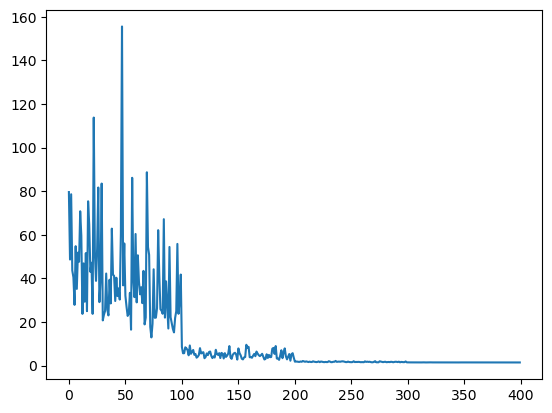

In [139]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(losses[:])

In [152]:
import torch 
x_test, y_test = generate_samples(1, -10, 10)
model.eval()
with torch.no_grad():
    pred = model(tensor(x_test))
print(pred, y_test)

tensor([[64.8744]], dtype=torch.float64) [[63.98071849]]


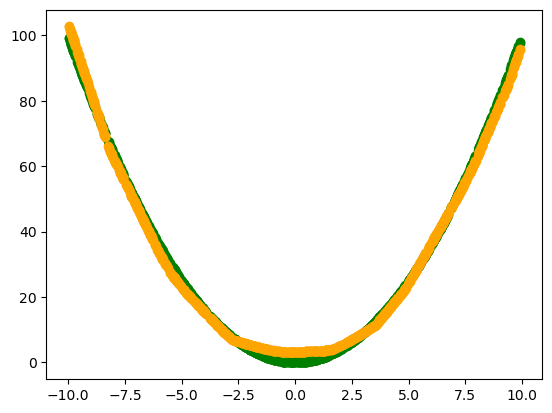

In [39]:
import torch
x_test, y_test = generate_samples(1000, -10, 10)
model.eval()
with torch.no_grad():
    pred = model(tensor(x_test))

plt.scatter(x_test, y_test, color='green')
plt.scatter(x_test, pred, color='orange')
plt.show()

In [238]:
x_test, y_test = generate_samples(100, 0, 100)
x_test = [[item[0], 0] for item in x_test]
import torch
model.eval()
preds = []
with torch.no_grad():
    pred = model(tensor(x_test))
    preds.append(pred)
plt.scatter([item[0] for item in x_test], [item.item() for item in preds[0]])

RuntimeError: mat1 and mat2 shapes cannot be multiplied (100x2 and 1x16)

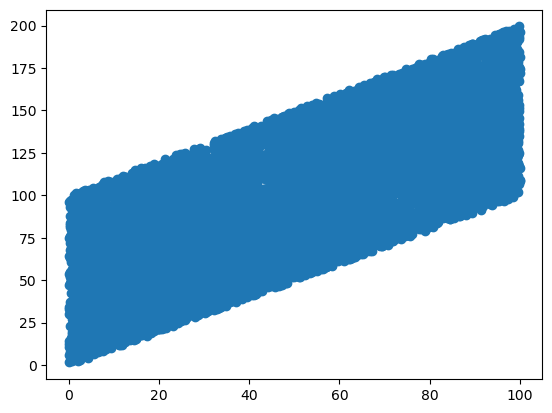

In [30]:
plt.scatter([item[1] for item in x], y)

In [27]:
y

[107.32147102619047,
 141.6719169902299,
 101.12814149478756,
 119.0956550793973,
 138.11073652900097,
 18.30390858056933,
 79.88917777174937,
 143.95644896527543,
 61.1799592574782,
 85.95921925834497,
 76.38536849189721,
 131.06560179477415,
 150.0903007261326,
 147.6875176057468,
 75.08251551051312,
 128.08704943856503,
 150.65642592838918,
 93.64133797989355,
 119.93000397627331,
 118.28612814939098,
 146.2478583216429,
 108.42807819662414,
 87.4682386670663,
 50.05460645629701,
 101.23041559641143,
 112.74767113720424,
 113.42287778657612,
 177.64668516393516,
 56.64872008244253,
 29.695701185928502,
 91.09311359796195,
 54.40658019450753,
 162.72870117200915,
 129.44650412220264,
 80.75219864819087,
 21.40452865672118,
 59.51240356410319,
 22.949586934598276,
 59.88919374852728,
 119.45657177045724,
 106.54137667509377,
 124.43691916230398,
 80.81702618533082,
 73.01652814662927,
 102.01237270614821,
 155.9717038746772,
 35.066938746667844,
 100.32455566918894,
 111.8200778828063